### 1. 데이터 로드 및 탐색
- **데이터의 첫 5개 행을 출력**하여 데이터 형식을 확인하세요.
- **데이터프레임의 컬럼 정보**와 **결측치 여부**를 확인하고 전처리 전략을 고민해보세요.

In [1]:
import pandas as pd

In [5]:
sheets = pd.read_excel('~/desktop/programming/data/online_retail_2.xlsx', sheet_name = None)

AttributeError: 'dict' object has no attribute 'head'

In [10]:
# 각 시트를 리스트로 모으기
df_list = list(sheets.values())

In [15]:
df = pd.concat(df_list, ignore_index = True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


In [17]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


### 2. 데이터 전처리
- **`InvoiceDate`** 컬럼을 날짜 형식으로 변환하고, **`Customer ID`** 에 결측치가 있는 행을 제거하세요.
- **`Customer ID`** 를 정수형으로 변환한 후, **`InvoiceDate`** 를 기준으로 데이터를 정렬하세요.
- 금액을 나타내는 새로운 컬럼 **`Total`** (`Quantity`와 `Price`를 곱한 값)을 생성하세요. 

In [19]:
df[df['Description'].isna()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.0,NaN,United Kingdom
3114,489655,20683,NaN,-44,2009-12-01 17:26:00,0.0,NaN,United Kingdom
3161,489659,21350,NaN,230,2009-12-01 17:39:00,0.0,NaN,United Kingdom
3731,489781,84292,NaN,17,2009-12-02 11:45:00,0.0,NaN,United Kingdom
4296,489806,18010,NaN,-770,2009-12-02 12:42:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
1060783,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
1060787,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
1060793,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
1062442,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [26]:
df = df[df.isna().sum(axis = 1) != 2]

In [27]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1062989 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1062989 non-null  object        
 1   StockCode    1062989 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1062989 non-null  int64         
 4   InvoiceDate  1062989 non-null  datetime64[ns]
 5   Price        1062989 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1062989 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 73.0+ MB


In [30]:
df[df['Customer ID'].isna()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
1066997,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
1066998,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
1066999,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
1067000,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [34]:
df.dropna(subset = 'Customer ID', inplace = True)

/var/folders/ww/fg12__b120v8jpm3fhfnj1x80000gn/T/ipykernel_67747/1546782583.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset = 'Customer ID', inplace = True)


In [35]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France


In [36]:
df['Customer ID'] = df['Customer ID'].astype(int)

/var/folders/ww/fg12__b120v8jpm3fhfnj1x80000gn/T/ipykernel_67747/2318257336.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Customer ID'] = df['Customer ID'].astype(int)


In [38]:
df['InvoiceDate'] = df['InvoiceDate'].dt.date

/var/folders/ww/fg12__b120v8jpm3fhfnj1x80000gn/T/ipykernel_67747/1935794558.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = df['InvoiceDate'].dt.date


In [40]:
df['Total'] = df['Quantity'] * df['Price']

/var/folders/ww/fg12__b120v8jpm3fhfnj1x80000gn/T/ipykernel_67747/847668450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total'] = df['Quantity'] * df['Price']


In [42]:
dropna_total_df = df.copy()

In [43]:
df = dropna_total_df.copy()

In [44]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,6.75,13085,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,6.75,13085,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2.10,13085,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,1.25,13085,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680,France,12.60
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680,France,16.60
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680,France,16.60
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09,4.95,12680,France,14.85


In [45]:
df.sort_values(by = 'InvoiceDate')

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085,United Kingdom,83.40
1596,489574,22083,PAPER CHAIN KIT RETRO SPOT,5,2009-12-01,2.95,13097,United Kingdom,14.75
1597,489574,22125,UNION JACK HOT WATER BOTTLE,2,2009-12-01,5.95,13097,United Kingdom,11.90
1598,489574,22088,PAPER BUNTING COLOURED LACE,1,2009-12-01,2.95,13097,United Kingdom,2.95
1599,489574,22093,MOTORING TISSUE BOX,3,2009-12-01,1.25,13097,United Kingdom,3.75
...,...,...,...,...,...,...,...,...,...
1066678,581496,22664,TOY TIDY DOLLY GIRL DESIGN,20,2011-12-09,0.79,16558,United Kingdom,15.80
1066679,581496,22721,SET OF 3 CAKE TINS SKETCHBOOK,12,2011-12-09,1.95,16558,United Kingdom,23.40
1066680,581496,72800E,4 IVORY DINNER CANDLES SILVER FLOCK,12,2011-12-09,0.79,16558,United Kingdom,9.48
1066673,581494,22549,PICTURE DOMINOES,12,2011-12-09,1.45,12518,Germany,17.40


### 3. 나라별 구매 인원 시각화
- Country 컬럼을 기준으로 Customer ID의 유니크한 값을 계산하여 나라별 구매 고객 수를 시각화 해보세요

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

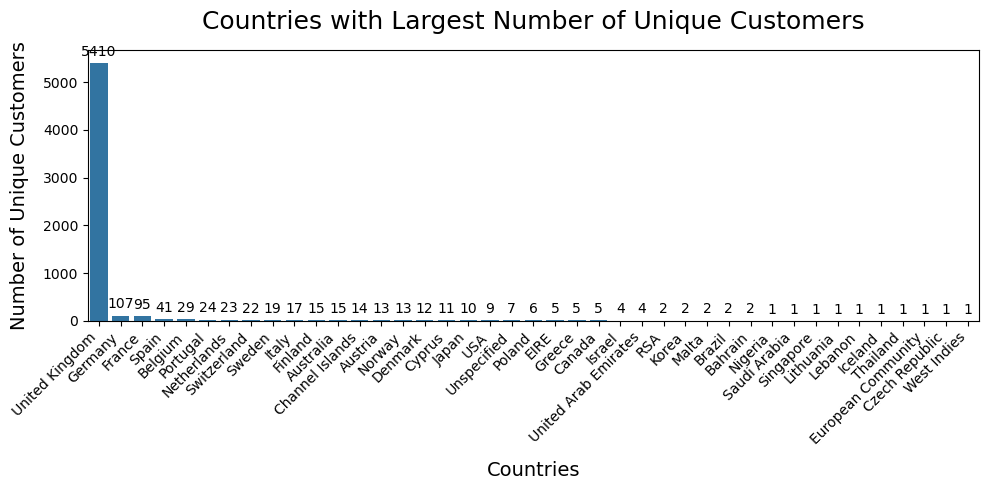

In [163]:
plt.figure(figsize = (10, 5))

# 1. 먼저 Country별 고유 Customer ID 수를 계산
agg_df = df.groupby('Country')['Customer ID'].nunique().reset_index()

# 2. 그 결과를 고유 고객 수 기준으로 내림차순 정렬
sorted_agg_df = agg_df.sort_values('Customer ID', ascending=False)

# 3. 여기서 Country 리스트를 뽑아서 order로 쓰기
order = sorted_agg_df['Country']

sns.barplot(
    x=df.groupby('Country')['Customer ID'].nunique().index,
    y=df.groupby('Country')['Customer ID'].nunique().values,
    # order = df.sort_values('Customer ID', ascending = False)['Country']
    order = order
)



# 현재 barplot의 축 객체를 가져오기
ax = plt.gca()

# 바 위에 숫자 표시
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)

# 레이블 회전 등 마무리
plt.xticks(rotation=45, ha='right')

# 5. 제목과 축 이름 추가
plt.title("Countries with Largest Number of Unique Customers", fontsize=18, pad=15)
plt.xlabel("Countries", fontsize=14, labelpad=10)
plt.ylabel("Number of Unique Customers", fontsize=14, labelpad=10)

# 여백 자동 조정 및 출력
plt.tight_layout()
plt.show()


In [82]:
df.sort_values('Customer ID')

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total
253035,513774,22690,DOORMAT HOME SWEET HOME BLUE,1,2010-06-28,7.49,12346,United Kingdom,7.49
371779,C525274,TEST001,This is a test product.,-1,2010-10-04,4.50,12346,United Kingdom,-4.50
587080,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18,1.04,12346,United Kingdom,77183.60
587085,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18,1.04,12346,United Kingdom,-77183.60
255595,C514024,M,Manual,-1,2010-06-30,142.31,12346,United Kingdom,-142.31
...,...,...,...,...,...,...,...,...,...
918204,570715,85173,SET/6 FROG PRINCE T-LIGHT CANDLES,48,2011-10-12,1.69,18287,United Kingdom,81.12
918205,570715,85039B,S/4 IVORY MINI ROSE CANDLE IN BOWL,48,2011-10-12,1.45,18287,United Kingdom,69.60
918206,570715,85039A,SET/4 RED MINI ROSE CANDLE IN BOWL,48,2011-10-12,1.45,18287,United Kingdom,69.60
918208,570715,23077,DOUGHNUT LIP GLOSS,20,2011-10-12,1.25,18287,United Kingdom,25.00


### 4. 고객 유입 분석 (Acquisition)
- 신규 고객 분석을 위해 고객의 **첫 구매 시점** 을 기준으로 월별 신규 유입 고객 수를 계산하세요.
- 각 고객의 첫 구매 날짜를 추출하고, **월별 신규 고객 수** 를 시각화하세요.

In [95]:
# df.groupby('Customer ID')['InvoiceDate'].min()

df['FirstCustomerDate'] = df['Customer ID'].map(df.groupby('Customer ID')['InvoiceDate'].min())

In [101]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total,FirstCustomerDate
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085,United Kingdom,83.40,2009-12-01
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,6.75,13085,United Kingdom,81.00,2009-12-01
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,6.75,13085,United Kingdom,81.00,2009-12-01
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2.10,13085,United Kingdom,100.80,2009-12-01
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,1.25,13085,United Kingdom,30.00,2009-12-01
...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680,France,12.60,2011-08-18
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680,France,16.60,2011-08-18
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680,France,16.60,2011-08-18
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09,4.95,12680,France,14.85,2011-08-18


In [ ]:
# df['FirstCustomerDate'] = pd.to_datetime(df['FirstCustomerDate'])
# df['FirstCustomerDate'].dt.strftime('%Y-%m')

0          2009-12
1          2009-12
2          2009-12
3          2009-12
4          2009-12
            ...   
1067366    2011-08
1067367    2011-08
1067368    2011-08
1067369    2011-08
1067370    2011-08
Name: FirstCustomerDate, Length: 824364, dtype: object

In [114]:
df['FirstCustomerDate'] = pd.to_datetime(df['FirstCustomerDate'])
df['FirstCustomerDate'] = df['FirstCustomerDate'].dt.to_period('M')

In [115]:
df['FirstCustomerDate']

0          2009-12
1          2009-12
2          2009-12
3          2009-12
4          2009-12
            ...   
1067366    2011-08
1067367    2011-08
1067368    2011-08
1067369    2011-08
1067370    2011-08
Name: FirstCustomerDate, Length: 824364, dtype: period[M]

In [146]:
# df.groupby(['FirstCustomerDate', 'Customer ID']).count()
# df.groupby('FirstCustomerDate').nunique('Customer ID')

mnc = df.groupby('FirstCustomerDate')['Customer ID'].nunique()

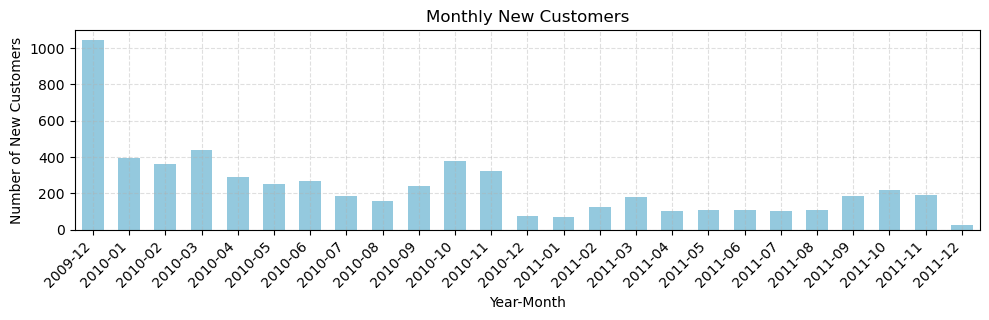

In [198]:
plt.figure(figsize = (10, 3.3))

sns.barplot(x = mnc.index, y = mnc.values, 
            width = 0.6, color = 'skyblue')

# 레이블 회전 등 마무리
plt.xticks(rotation=45, ha='right')

# 5. 제목과 축 이름 추가
plt.title("Monthly New Customers")
plt.xlabel("Year-Month")
plt.ylabel("Number of New Customers")

plt.grid(linestyle = '--', alpha = 0.4)

# 여백 자동 조정 및 출력
plt.tight_layout()
plt.show()

### 고객 활성화 분석 (Activation)
- 모든 고객 중 첫 구매 이후 **총 구매 금액이 특정 기준 금액 (£50)** 이상인 고객을 활성화된 고객으로 정의합니다.
- 전체 고객 수와 활성화된 고객 수를 비교하여 **활성화율** 을 도출하세요.

In [224]:
customer_all = df['Customer ID'].nunique()
customer_activated = (df.groupby('Customer ID')['Total'].sum() > 50).sum()
activate_rate = round(customer_activated / customer_all * 100, 2)

In [233]:
print(
f'총 고객 수 : {customer_all}명\n' 
f'활성화된 고객 수 : {customer_activated}명\n' 
f'고객 활성화율 : {activate_rate}%'
)

총 고객 수 : 5942명
활성화된 고객 수 : 5777명
고객 활성화율 : 97.22%


In [235]:
print(
f'''
총 고객 수 : {customer_all}명
활성화된 고객 수 : {customer_activated}명 
고객 활성화율 : {activate_rate}%
''')


총 고객 수 : 5942명
활성화된 고객 수 : 5777명 
고객 활성화율 : 97.22%



### 6. 코호트 분석 (Retention)
- 분기별 활성 사용자(MAU)를 분석하여 고객 유지 현황을 파악하세요.
- 분기별 활성 고객 수를 계산하고, 이를 시각화하여 **고객 유지 트렌드**를 분석하세요.

In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 824364 entries, 0 to 1067370
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype    
---  ------            --------------   -----    
 0   Invoice           824364 non-null  object   
 1   StockCode         824364 non-null  object   
 2   Description       824364 non-null  object   
 3   Quantity          824364 non-null  int64    
 4   InvoiceDate       824364 non-null  period[M]
 5   Price             824364 non-null  float64  
 6   Customer ID       824364 non-null  int64    
 7   Country           824364 non-null  object   
 8   Total             824364 non-null  float64  
 9   FirstInvoiceDate  824364 non-null  period[M]
 10  CohortMonth       824364 non-null  int64    
dtypes: float64(2), int64(3), object(4), period[M](2)
memory usage: 75.5+ MB


In [246]:
df.rename(columns = {'FirstCustomerDate' : 'FirstInvoiceDate'}, inplace = True)

In [289]:
df['InvoiceDate'] = df['InvoiceDate'].asfreq('QE-DEC')

In [290]:
df['FirstInvoiceDate'] = df['FirstInvoiceDate'].asfreq('QE-DEC')

In [291]:
df['CohortMonth'] = (df['InvoiceDate'] - df['FirstInvoiceDate'])

In [292]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total,FirstInvoiceDate,CohortMonth
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,NaT,6.95,13085,United Kingdom,83.40,NaT,NaT
1,489434,79323P,PINK CHERRY LIGHTS,12,NaT,6.75,13085,United Kingdom,81.00,NaT,NaT
2,489434,79323W,WHITE CHERRY LIGHTS,12,NaT,6.75,13085,United Kingdom,81.00,NaT,NaT
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,NaT,2.10,13085,United Kingdom,100.80,NaT,NaT
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,NaT,1.25,13085,United Kingdom,30.00,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,NaT,2.10,12680,France,12.60,NaT,NaT
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,NaT,4.15,12680,France,16.60,NaT,NaT
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,NaT,4.15,12680,France,16.60,NaT,NaT
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,NaT,4.95,12680,France,14.85,NaT,NaT


In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 824364 entries, 0 to 1067370
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype    
---  ------            --------------   -----    
 0   Invoice           824364 non-null  object   
 1   StockCode         824364 non-null  object   
 2   Description       824364 non-null  object   
 3   Quantity          824364 non-null  int64    
 4   InvoiceDate       824364 non-null  period[M]
 5   Price             824364 non-null  float64  
 6   Customer ID       824364 non-null  int64    
 7   Country           824364 non-null  object   
 8   Total             824364 non-null  float64  
 9   FirstInvoiceDate  824364 non-null  period[M]
 10  CohortMonth       824364 non-null  object   
dtypes: float64(2), int64(2), object(5), period[M](2)
memory usage: 75.5+ MB
